In [17]:
knitr::opts_chunk$set(echo = FALSE)
library(tidyverse)
library(dplyr)
library(xtable)
library(ggplot2)
library(knitr)
# install.packages("kableExtra", repos='http://cran.us.r-project.org')
library(kableExtra)
dat = read.csv("LA_DFW_Data.csv")[,1:14]
dat = dat[-1,]
dat$DFW = dat$DF.Number+dat$W.Number
attach(dat)

The following objects are masked from dat (pos = 3):

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course, Course.Name,
    DF.Number, DFW, DFW.Cate, Historical.DFW, LA, LA..Yes.1..No.0.,
    Students, Term, W.Number

The following objects are masked from dat1:

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course.Name,
    DF.Number, DFW, LA, Students, Term, W.Number

The following objects are masked from dat (pos = 5):

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course, Course.Name,
    DF.Number, DFW, DFW.Cate, Historical.DFW, LA, LA..Yes.1..No.0.,
    Students, Term, W.Number



## Abstract  
FGCU’s Learning Assistant program began in 2016 and spanned a wide range of STEM disciplines. In the last year, it has expanded to non-STEM classes as well. We are interested in measuring the effectiveness of the program and determining methods of improvement for the future based on DFW rates.

## Background  
The Learning Assistant (LA) model is a relatively new concept. It began at the University of Colorado at Boulder in 2003 and has spread to over 200 universities around the United States due to the success they had. The most familiar role that one may compare an LA to is a Teacher's Assistant (TA) or an Instructional Assistant (IA). LA's are talented undergraduates who have recently taken a course and remember what it is like to learn the material. However, there are significant differences between them and TA's or IA's that allows them to be in a category of their own. They help transform undergraduate courses to include small groups of students articulating, defending, and modifying their ideas about relevant problems or phenomena. Their main role is to support student learning in interactive classroom environments, working with small groups of students as they solve challenging conceptual or mathematical problems. They are required to take a pedagogy course during their first semester as an LA so they can develop their skills and theoretical understanding of effective teaching techniques. \cite{UC_LA} \cite{cochran}

![The LA model varies significantly from a traditional classroom.](/Users/blakegilliland/Documents/GitHub/LA_Assesment)  

There has been research conducted on what the impact of LA's are in the classroom. Using Learning Assistant Supported Student Outcomes (LASSO), a web-based learning gains assessment application that provides validated instruments accross a range of disciplines, researchers have been able to conduct statistical analysis on specific ways that having an LA model can affect student performance accross various courses.  

One paper entitled "The Impact of Learning Assistants on Inequities in Physics Student Outcomes" gave noteworthy results. These researchers investigated how LA's can help underrepresented minorities to succeed in physics classes and how it stacks up to majority students.  They used pre-/post- test score on a number of exams on commmon topics accross many different universities to determine an effect size, known in statistics as Cohen’s d. Cohen's d is a measurement of the difference between the means of two groups, often but not always used with before/after situations, and is used when the groups have similar standard deviations. They implemented other types of analyses including predictive models for outcomes and other student performance metrics. Many of the results were statistically significant indicating that LA's seriously help underrepresented minorities to be more successful in physics courses. \cite{VanDusen1}

Another paper entitled "LASSO Study Initial Findings" is a report on some research done accross disciplines and universities comparing student outcomes in courses with LA’s to those without them.  They did pre-/post-tests using surveys with topics from concept inventories including chemistry, physics, biology, and genetics. The questions they wanted to answer are as follows: 

1. How do teachers’ uses of LA's predict student performance in LA supported courses, if at all?
2. How do course attributes predict student performance in LA supported courses, if at all?
3. How do students’ attributes predict student performance in LA supported courses, if at all?
4. How do students’ interactions with LA's predict student performance in LA supported courses, if at all?

They had a number of statistically significant results which included females having a statistically significantly lower effect size than males (Cohen’s d), and that the average effect sizes for white students were statistically significantly different from Asian, black, and "other” students.  Also, "students average effect size increases with the amount of time they spend with LAs.  The trend peaks at 16-30 minutes/week, which is also the only category to be statistically significant from the 0 minutes/week category.” There were other significant outcomes, as well. \cite{VanDusen2}

Florida Gulf Coast University (FGCU) has been running their LA program since 2016 with the help of Noyce@FGCU, a grant awarded in 2015 to the university to help encourage STEM majors to pursue teaching careers. The intent of Noyce@FGCU was to build a lasting pipeline of talented STEM students from underrepresented groups to meet the growing needs of diverse Southwest Florida school districts. The program’s mission was, and still is, to recruit undergraduate STEM majors in Biology, Chemistry, Mathematics, and Engineering, and to prepare them to become grades 6-12 Science or Math teachers. The Noyce Scholars undertake an Education Minor and become certified teachers at high needs public schools. They wanted to increase the number of STEM classroom teachers for grades 6–12 by producing qualified STEM teachers for filling critical shortages of math and science teachers in Southwest Florida. \cite{johnson}

Similarly, they were interested in increasing the success of Noyce@FGCU classroom teachers through preservice enrichment, first-year mentoring by an in-school teacher, and having a first-year in service coach. They support teacher certification of Noyce@FGCU scholars so that they complete certification testing before graduation, including support through cooperation with the school districts for a successful completion of the first-year of professional teaching.  

Beginning in the fall of 2019, the Office of Undergraduate Scholarship began funding the program. Appropriately, they wanted to carefully examine the LA program and make sure that it was reaching its goals of improving student performance. There are some outstanding questions that there are not answers to yet locally. From the aforementioned previous research, it is clear that the LA model has serious upside and our program would like to see similar results. While we do not currently have nearly the resources and data that these other research projects have used, we do have basic indicators as a starting point. In the future, we wish to be able to answer more sophisitcated and intricate questions regarding the health and effectiveness of the program, particularly when it comes to its effect on minorities and differences between females and males. The questions we wish to consider in this paper are as follows:

1. Do D/F/Withdrawl (DFW) rates among all subject areas improve when an LA is present compared to when they are not?
2. Do DFW rates among classes with the same instructor improve when an LA is present compared to when they are not?

## Methodology & Analysis

Our goal is to see how DFW are affected by instituting the LA model. We collected data describing these rates accross a total of 18 courses that had sections with and without an LA using Tableau.

In [18]:
tab1 = aggregate(DFW,list(LA,Course.Name),sum)
tab2 = aggregate(Students,list(LA,Course.Name),sum)
tab3 = cbind(tab1,round(tab1[,3]/tab2[,3],2))
colnames(tab3) = c("LA","Course","DFW Count","DFW Rate")
kable(tab3,longtable=T, booktabs = T,row.names=F) %>% kable_styling(latex_options = c("repeat_header","HOLD_position","striped", "condensed"), font_size=7)

<table class="table" style="font-size: 7px; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> LA </th>
   <th style="text-align:left;"> Course </th>
   <th style="text-align:right;"> DFW Count </th>
   <th style="text-align:right;"> DFW Rate </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:left;"> Calculus I </td>
   <td style="text-align:right;"> 124 </td>
   <td style="text-align:right;"> 0.33 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:left;"> Calculus I </td>
   <td style="text-align:right;"> 39 </td>
   <td style="text-align:right;"> 0.28 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:left;"> Calculus II </td>
   <td style="text-align:right;"> 26 </td>
   <td style="text-align:right;"> 0.20 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:left;"> Calculus II </t

As mentioned, we wish to be able to answer the question of whether DFW rates improve (decrease) when an LA is present compared to when they are not. Due to limitations with the data, i.e. not having as much of it as we would have liked (n $\approx$ 30), we need to perform a Shapiro-Wilk Normality test. This test will take in the data, examine its shape relative to the number of data points, and determine if it is normal *enough* to use parametric tests. The Shapiro-Wilk Normality test would not be appropriate to use when having larger data sets. We will perform the test on the difference between the LA DFW rates and the Non-LA DFW rates since what we are interested in is whether DFW rates in LA courses are lesser than the alternative.

Our hypothesis is that the data is normal and thus a significant p-value would indicate non-normal data. Shapiro-Wilk Normality test for DFW Rates accross sections (with and without LA's) ($\alpha = .05$), along with a histogram of the data being tested:


	Shapiro-Wilk normality test

data:  tab3$`DFW Rate`[tab3$LA == "Yes"] - tab3$`DFW Rate`[tab3$LA ==     "No"]
W = 0.97381, p-value = 0.8655


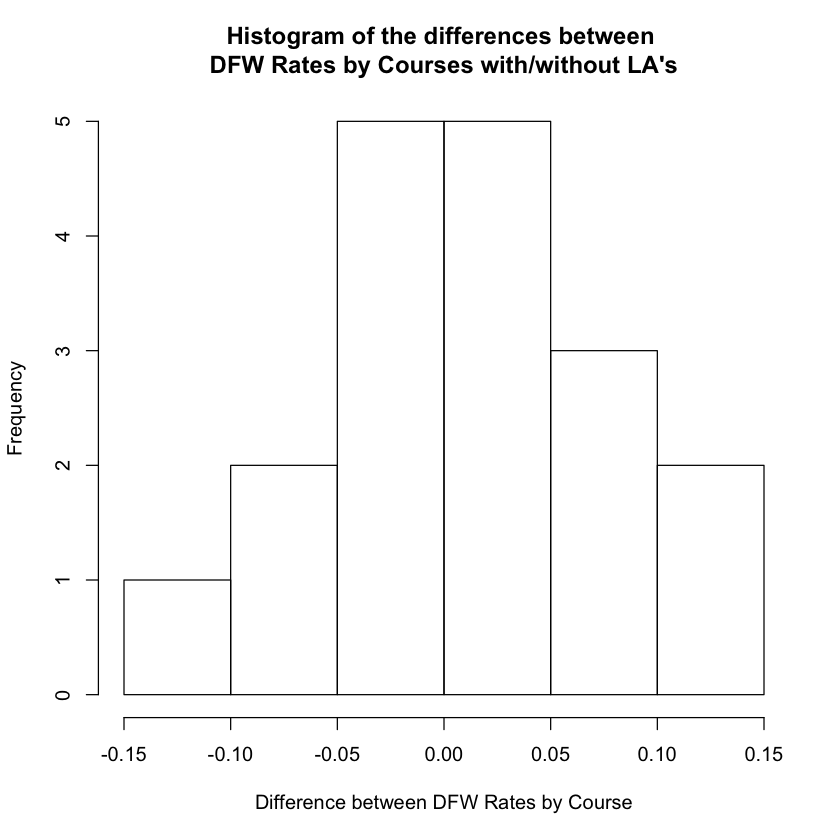

In [19]:
shapiro.test(tab3$`DFW Rate`[tab3$LA=="Yes"]-tab3$`DFW Rate`[tab3$LA=="No"])
hist(tab3$`DFW Rate`[tab3$LA=="Yes"]-tab3$`DFW Rate`[tab3$LA=="No"],xlab = "Difference between DFW Rates by Course",main=paste("Histogram of the differences between \nDFW Rates by Courses with/without LA's"))

Since we have a p-value of p = .8655, we fail to reject our hypothesis and thus we have evidence to conclude the difference between DFW rates for courses with and without LA's does follow an approximately normal distribution.

We may now proceed with our testing. We choose to employ a left tailed, two-sample, paired, t-test for differences in DFW rates accross sections based on presence of LA's ($\alpha = .05$). We test against the hypothesis that DFW rates in courses with LA's are equivalent to that of non-LA courses.

In [20]:
LA_DFW<-tab3$`DFW Rate`[tab3$LA=="Yes"]
NonLA_DFW<-tab3$`DFW Rate`[tab3$LA=="No"]
t.test(LA_DFW,NonLA_DFW,paired=TRUE,alternative="less")


	Paired t-test

data:  LA_DFW and NonLA_DFW
t = 0.8984, df = 17, p-value = 0.8092
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.0391512
sample estimates:
mean of the differences 
             0.01333333 


We observe a test statistic of  t = .8984 and an associated p-value of p = .8092. Thus we fail to reject the hypothesis that there are no differences in DFW rates among courses with LA's compared to those without them. This definitely is not the desired result from the LA Program's point of view. Even though the p-value is not significant in either direction, it is noteworthy that we do not even observe a decrease in the mean difference between rates of LA and non-LA courses. In other words, the mean DFW rate in non-LA courses ($\mean{x_{non}} = .23$) is lower than that of LA courses ($\mean{x_{LA}} = .25$).

For LA courses to have significantly lower DFW rates, the density would need to be shifted considerably leftward. As is, our distributions are remarkably similar in shape and location.$\\$


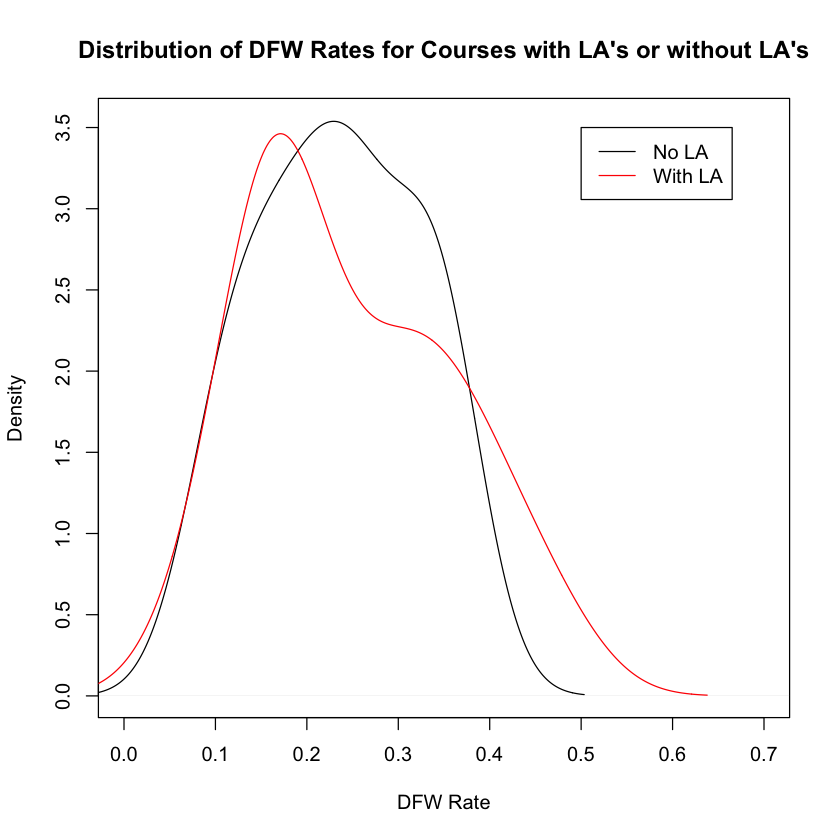

In [21]:
plot(density(tab3$`DFW Rate`[tab3$LA =="No"]),xlim=c(0,.7),main = "Distribution of DFW Rates for Courses with LA's or without LA's",xlab = "DFW Rate")
lines(density(tab3$`DFW Rate`[tab3$LA =="Yes"]),col="red")
legend(x=.5,y=3.5,col = c("Black", "Red"),legend=c("No LA","With LA"),lwd=1)

As can be seen in the density plot above, the distribution of DFW rates for both groups are very similar. For LA's to be seen as more effective, the respective density would need a significant leftward shift.

We would also like to examine the DFW rates in a different context. Accross courses, as we have just discussed, was the most obvious and broad way to compare LA courses to Non-LA courses. However, there are issues with it such as not being able to account for different teaching styles and abilities of instructors in those courses among other things.

We will filter our courses by instructor and pair on LA and Non-LA courses. The courses will still be separated, however. In other words, we will compare LA and Non-LA DFW rates by pairing instructors who have taught the same course with and without LA's. This way we can account for teaching style and mitigate that variance. We will assign instructors a number for anonymity.

In [22]:
dat1 = read.csv("PairedData.csv")[,4:15]
#dat1 = dat1[-1,]
dat1$DFW = dat1$DF.Number+dat1$W.Number
attach(dat1)

The following objects are masked from dat (pos = 3):

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course.Name,
    DF.Number, DFW, LA, Students, Term, W.Number

The following objects are masked from dat (pos = 4):

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course.Name,
    DF.Number, DFW, LA, Students, Term, W.Number

The following objects are masked from dat1 (pos = 5):

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course.Name,
    DF.Number, DFW, Instructor, Instructors, LA, Students, Term,
    W.Number

The following objects are masked from dat (pos = 6):

    Avg..DF.RATE, Avg..DFW.RATE, Avg..W.RATE, CRN, Course.Name,
    DF.Number, DFW, LA, Students, Term, W.Number



In [23]:
tab1 = aggregate(DFW,list(LA,Instructors),sum)
tab2 = aggregate(Students,list(LA,Instructors),sum)
tab3 = cbind(tab1,round(tab1[,3]/tab2[,3],2))
colnames(tab3) = c("LA","Instructors","DFW Count","DFW Rate")
kable(tab3,longtable=T, booktabs = T,row.names=F) %>% kable_styling(latex_options = c("repeat_header","HOLD_position","striped", "condensed"), font_size=7)

<table class="table" style="font-size: 7px; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> LA </th>
   <th style="text-align:right;"> Instructors </th>
   <th style="text-align:right;"> DFW Count </th>
   <th style="text-align:right;"> DFW Rate </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 25 </td>
   <td style="text-align:right;"> 0.32 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 27 </td>
   <td style="text-align:right;"> 0.36 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> No </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 19 </td>
   <td style="text-align:right;"> 0.26 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Yes </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:r

Again, we do not have enough data to assume using parametric tests would be appropriate so a Shapiro-Wilk test is used to determine if a nonparametric approach would be the appropriate route to take. As before with the by-course data, we will perform the test on the differences between the by-instructor DFW rates ($\alpha = .05)$:


	Shapiro-Wilk normality test

data:  tab3$`DFW Rate`[tab3 == "Yes"] - tab3$`DFW Rate`[tab3$LA == "No"]
W = 0.63002, p-value = 4.869e-05


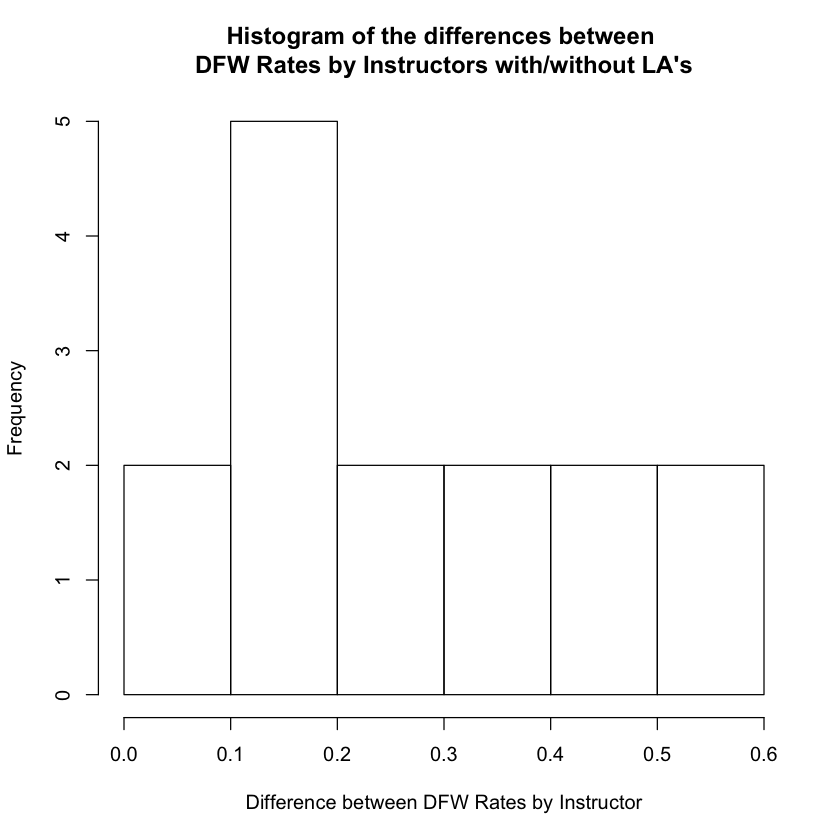

In [24]:
shapiro.test(tab3$`DFW Rate`[tab3 == "Yes"]-tab3$`DFW Rate`[tab3$LA == "No"])
hist(tab3$`DFW Rate`[tab3$LA == "No"],xlab = "Difference between DFW Rates by Instructor",main=paste("Histogram of the differences between \nDFW Rates by Instructors with/without LA's"))

Our p-value, which is nearly 0, is less than $\alpha = .05$ thus we may conclude that the differences between DFW rates controlled by instructor is not approximately normally distributed. As a result, we will use a nonparametric test to test for differences. 

A left-tailed, two-sample, and paired Wilcoxon Signed-Rank test will be used to test against the hypothesis that the average DFW rate in LA courses is equivalent to that of Non-LA courses ($\alpha = .05$).

In [25]:
LA_DFW<-tab3$`DFW Rate`[tab3 == "Yes"]
NonLA_DFW<-tab3$`DFW Rate`[tab3$LA == "No"]
wilcox.test(LA_DFW,NonLA_DFW,alternative = "less",paired = T)

Warning message in wilcox.test.default(LA_DFW, NonLA_DFW, alternative = "less", :
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(LA_DFW, NonLA_DFW, alternative = "less", :
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  LA_DFW and NonLA_DFW
V = 36, p-value = 0.6225
alternative hypothesis: true location shift is less than 0


With a p-value of p=.6225, we fail to reject our hypothesis that the differences between DFW rates between courses controlled by instructor with/without LA's is in the favor of LA courses. $\\$

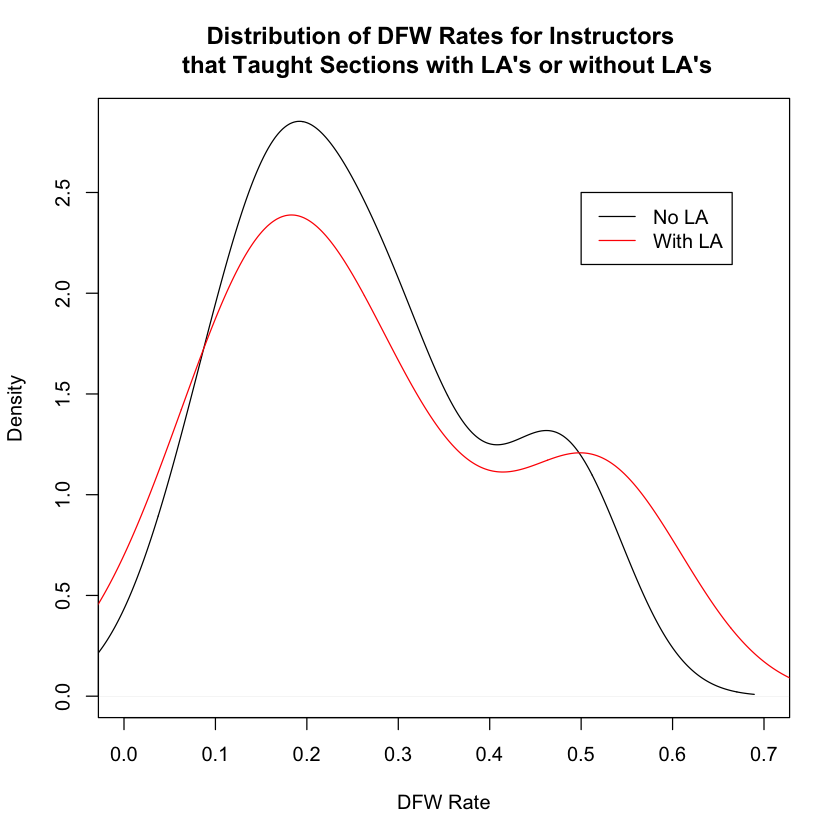

In [26]:
plot(density(LA_DFW),xlim=c(0,.7),main = paste("Distribution of DFW Rates for Instructors \n that Taught Sections with LA's or without LA's"),xlab = "DFW Rate")
lines(density(NonLA_DFW),col="red")
legend(x=.5,y=2.5,col = c("Black", "Red"),legend=c("No LA","With LA"),lwd=1)

## Conclusions, Interpretations, & Considerations

We have seen from our analysis, be it limited due to limitations on data availability and integrity, that there is not evidence to conclude that having a Learning Assistant in the class room is having a positive effect on students' ability to pass courses. However, it is our conjecture that there is reason to believe that there are underlying truths in the data that were not represented in the data due to lack of foresight when recording the data. For example, courses with a Learning Assistant had only one and no Instructional Assistants. However, courses with no Learning Assistants may have had an Instructional Assistant. So, in our Non-LA data we may have had courses who had an assistant in the classroom who, though not having the role of a Learning Assistant, could be trained as one and is utilizing the techniques they have learned in the pedagogy course. This would cause a leftward shift in the DFW rates. Going forward, when recording data we will account for all types of assistants participating in the course.

Another consideration for why we do not see significant differences is lack of training. Instructors may participate and self-select Learning Assistants without ever going through rigorous training on how Learning Assistants are to be utilized in the classroom. Most do not restructure the classroom by forming the small groups and raising classtime interaction. Simply, Learning Assistants are being used as Instructional Assistants. This defeats the point of the Learning Assistant program.

Can we do better with our data? Are DFW rates the best indicator for Learning Assistant impact on student performance? Perhaps not. This too could account for lack of differences.

Too, an issue that cannot be ignored: lack of funding and support from the university, many participating faculty in the program have expressed, limits the program's ability to train participating members and implement the structure and policies that universities with growing programs have. There is a desperate need to thoroughly train instructors on how to commit and transition to a new classroom structure. Learning Assistants need to have a similar program in addition to the pedagogy course. Funding for trips to the Learning Assistant program conferences around the country need to be available so that the spread of ideas is reaching FGCU.

## Future Research

As mentioned, the data needs to be better. Collection and recording techniques must improve to have data with higher integrity, as well as more kinds of data to do a wider and more thorough analysis on. There are many analyses and data collection approaches from the literature available that is worth looking into for future prospects. Making use of LASSO would have a clear positive effect on improving the quality of data. Implementing pre-/post- exams for all LA based courses that come from a concept inventory would be an effective constant to limit variability in results. \cite{VanDusen1}

As far as analysis goes, once that data is obtained, we would like to do more predictive modeling than inferential statistics. Currently, we are implementing a multiple multivariate linear regression model to predict student grades regressed on instructor, presence of an LA, the term the course is in, and what the course is. So, this goes further than simple DFW rates. It will get at exact grades to see if passing students potentially pass at a higher level with an LA than those who do not have one. But after this we would like to do more with comparing differences between LA effects on sexes (male/female), ethnicity, college generation, as well. \cite{VanDusen2}

Though overall the analysis we have conducted did not give results in favor of the LA program, there is consolation by a few of the courses such as Introduction to Computer Science (COP 1500) and Introduction to Programming (COP 2006). For years these classes have been on the cutting edge of involving Learning Assistants and have seen great results in the form of extremely low DFW rates. We plan to examine these courses more thoroughly for differences between and their Non-LA counterparts in hopes of implementing some of the techniques used in those classrooms.

## Acknowledgements

Thank you to Dr. Galen Papkov for mentoring me through the research process and giving me guidance on using R to perform the analysis and R Markdown to create the report. 

I also would like to thank the Office of Undergraduate Scholarship as well as Dr. Katie Johnson for giving me the opportunity to take the reigns on this research, giving me a perfect balance of guidance and autonomy for the direction we wanted to take the analysis in. Dr. Charles Gunnels, the head of the office, was instrumental in obtaining the data and providing a vision that will be used on into the future for the goal of strengthening the Learning Assistant program.

\bibliographystyle{plain}
\bibliography{ref}